In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('soccer_international_history_dataset.csv')
df.head()

,match_date,home_country,away_country,home_score,away_score,match_type,match_city,match_country,home_team_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Win


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38685 entries, 0 to 38684
Data columns (total 9 columns):
match_date          38685 non-null object
home_country        38685 non-null object
away_country        38685 non-null object
home_score          38685 non-null int64
away_score          38685 non-null int64
match_type          38685 non-null object
match_city          38685 non-null object
match_country       38685 non-null object
home_team_result    38685 non-null object
dtypes: int64(2), object(7)
memory usage: 2.7+ MB


In [11]:
df.keys()

Index(['match_date', 'home_country', 'away_country', 'home_score',
       'away_score', 'match_type', 'match_city', 'match_country',
       'home_team_result'],
      dtype='object')

In [12]:
# df['home_team_result'] = df.rename(columns={'Win':1,'Loss':2,'Draw':3},axis=1)
df["home_team_result"] = df["home_team_result"].map({'Win':1,'Loss':2,'Draw':3})

In [13]:
# result = pd.get_dummies(df['home_team_result'],drop_first=True)

In [14]:
df.head()

,match_date,home_country,away_country,home_score,away_score,match_type,match_city,match_country,home_team_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,3
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,1


In [15]:
X = df.iloc[:,[3,4]]
y = df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
y_pred = knn.predict(X_test)

In [38]:
y_test.shape

(11606,)

In [36]:
y_pred[500]

1

In [35]:
y_test[500]

1

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,y_pred))

[[5583    0    0]
 [   0 3327    0]
 [   0    0 2696]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5583
           2       1.00      1.00      1.00      3327
           3       1.00      1.00      1.00      2696

    accuracy                           1.00     11606
   macro avg       1.00      1.00      1.00     11606
weighted avg       1.00      1.00      1.00     11606



In [26]:
import matplotlib.pyplot as plt

(array([5583.,    0.,    0.,    0.,    0., 3327.,    0.,    0.,    0.,
        2696.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

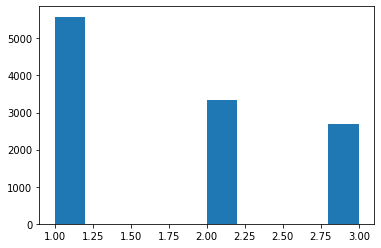

In [30]:
plt.hist(y_pred)

In [39]:
11606 - 5583

6023